In [90]:
import pandas as pd


In [113]:
data=pd.read_csv('../Boston1.csv')

In [103]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


{'whiskers': [<matplotlib.lines.Line2D at 0x17ffe79a128>,
 'caps': [<matplotlib.lines.Line2D at 0x17ffe79a828>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ffe78ddd8>],
 'medians': [<matplotlib.lines.Line2D at 0x17ffe79af28>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ffe7a22e8>],
 'means': []}

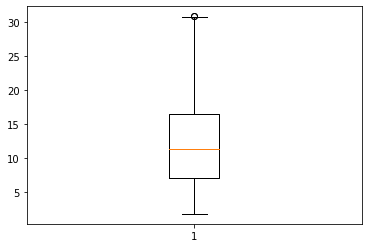

In [116]:
import matplotlib.pyplot as plt

plt.boxplot(data['lstat'])

In [115]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data['crim'].max()

88.9762

In [93]:
import numpy as np
q1, q3= np.percentile(data['lstat'],[25,75])


In [94]:
q1

6.949999999999999

In [95]:
q3

16.955000000000002

In [1]:
iqr = q3 - q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr


NameError: name 'q3' is not defined

In [97]:
print(lb,ub)

-8.057500000000005 31.962500000000006


In [98]:
median=data['lstat'].median()
median

11.36

In [114]:
data.loc[((data['lstat']>31.96 )| (data['lstat']<-8.1)),'lstat']=median

In [117]:
y=pd.DataFrame(data.iloc[:,-1])

In [118]:
x=pd.DataFrame(data.iloc[:,:-1])

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [121]:
x_train.shape

(354, 13)

In [122]:
x_test.shape

(152, 13)

In [123]:
y_train.shape

(354, 1)

In [124]:
y_test.shape

(152, 1)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
M2=LinearRegression()

In [127]:
M2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
y_pred=M2.predict(x_test)

In [129]:
y_pred

array([[32.14956648],
       [27.98418498],
       [17.45733012],
       [21.53750236],
       [18.7614871 ],
       [20.53985864],
       [32.07767118],
       [17.91376319],
       [24.12784276],
       [26.68855643],
       [27.53817355],
       [28.96257837],
       [20.54130504],
       [25.97559547],
       [23.14398459],
       [20.15140836],
       [16.12537673],
       [39.06945097],
       [29.87796733],
       [ 7.17791369],
       [20.65724099],
       [16.01590926],
       [25.48661987],
       [25.20082241],
       [31.09535955],
       [ 9.24060038],
       [12.90465732],
       [16.99401237],
       [36.46365654],
       [13.50774457],
       [21.82206257],
       [13.36453307],
       [43.12186817],
       [17.5522254 ],
       [21.73844165],
       [19.89406682],
       [17.08973419],
       [27.84906985],
       [ 7.42165497],
       [19.61236372],
       [24.27126772],
       [21.6742371 ],
       [29.58206714],
       [15.11999429],
       [18.61282125],
       [13

In [130]:
y_pred=pd.DataFrame(y_pred,columns=['Predicted Value'])

In [131]:
y_pred

,Predicted Value
0,32.149566
1,27.984185
2,17.457330
3,21.537502
4,18.761487
...,...
147,16.336737
148,28.421333
149,20.449629
150,33.924489


In [132]:
from sklearn import metrics
r2=metrics.r2_score(y_test,y_pred)

In [134]:
r2

0.8042044096298497